## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [230]:
import numpy as np
import pandas as pd

In [231]:
students=pd.read_csv('students.csv',delimiter=';')
students.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,6,11,11,10
69,GP,F,15,R,LE3,T,3,1,other,other,...,4,4,2,2,3,3,12,16,16,16
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
383,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,6,5,0


In [232]:
students.shape

(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [233]:
students.index.rename("number", inplace=True)

In [234]:
students.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
349,MS,M,18,R,GT3,T,3,2,other,other,...,2,5,5,5,5,5,10,11,13,13
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
355,MS,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,5,0,10,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [235]:
students.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There is no missing values to drop

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [236]:
students.select_dtypes(include='object').T

number,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,F,M,M,F,M,M,...,F,F,F,F,F,M,M,M,M,M
address,U,U,U,U,U,U,U,U,U,U,...,R,R,R,U,U,U,U,R,R,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3,...,GT3,GT3,GT3,LE3,GT3,LE3,LE3,GT3,LE3,LE3
Pstatus,A,T,T,T,T,T,T,A,A,T,...,T,T,T,T,T,A,T,T,T,T
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,...,at_home,teacher,services,teacher,other,services,services,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other,...,other,at_home,other,services,other,services,services,other,other,at_home
reason,course,course,other,home,home,reputation,home,home,home,home,...,other,reputation,course,course,course,course,course,course,course,course
guardian,mother,father,mother,mother,father,mother,mother,mother,mother,mother,...,mother,mother,mother,mother,mother,other,mother,other,mother,father
schoolsup,yes,no,yes,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [237]:
students.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [238]:
students=students.drop(students.var()[students.var() < 1].index.values, axis=1)
students.T

number,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,F,M,M,F,M,M,...,F,F,F,F,F,M,M,M,M,M
age,18,17,15,15,16,16,16,17,15,15,...,18,18,19,18,18,20,17,21,18,19
address,U,U,U,U,U,U,U,U,U,U,...,R,R,R,U,U,U,U,R,R,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3,...,GT3,GT3,GT3,LE3,GT3,LE3,LE3,GT3,LE3,LE3
Pstatus,A,T,T,T,T,T,T,A,A,T,...,T,T,T,T,T,A,T,T,T,T
Medu,4,1,1,4,3,4,2,4,3,3,...,2,4,2,3,1,2,3,1,3,1
Fedu,4,1,1,2,3,3,2,4,2,4,...,2,4,3,1,1,2,1,1,2,1
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,...,at_home,teacher,services,teacher,other,services,services,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other,...,other,at_home,other,services,other,services,services,other,other,at_home


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [239]:
students.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
goout          int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [240]:
from sklearn.preprocessing import LabelEncoder

In [241]:
data=students.apply(LabelEncoder().fit_transform)

In [242]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,1,1,4,4,3,7,7


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [243]:
Classes=pd.DataFrame(np.where(data >= 10, 1, 0), columns=data.columns)

In [244]:
Classes.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [245]:
X=Classes.drop("G3",axis=1)
y=Classes["G3"]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [246]:
import seaborn as sns

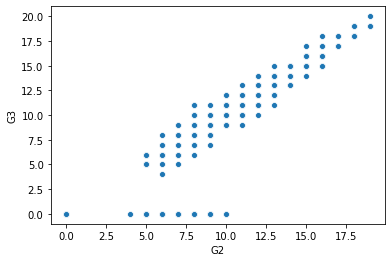

In [247]:
sns.scatterplot(x="G2", y="G3", data=students)

G3 has strong relationship with G2 and there are few outliers as well.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [248]:
from seaborn import countplot

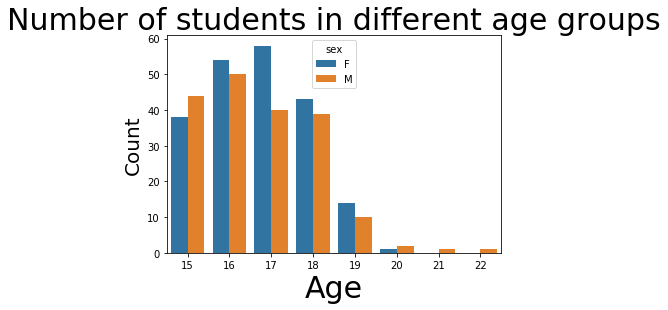

In [249]:
b = sns.countplot('age',hue='sex', data=students)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

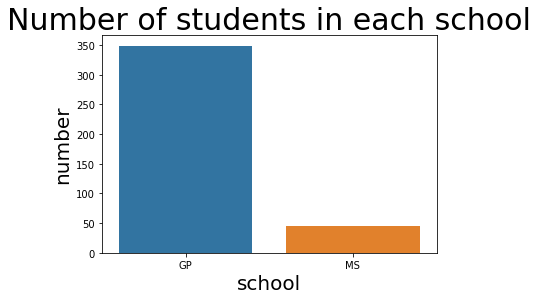

In [250]:
b = sns.countplot(students['school'])
b.axes.set_title('Number of students in each school', fontsize = 30)
b.set_xlabel('school', fontsize = 20)
b.set_ylabel('number', fontsize = 20)
plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [251]:
datanew=Classes.head(300)

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
X = datanew.drop("G3", axis=1)
y = datanew["G3"]

In [254]:
test_size = 0.3
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [255]:
X_train.shape

(210, 26)

In [256]:
X_test.shape

(90, 26)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [259]:
y_predict = model.predict(X_test)

In [260]:
model_score = model.score(X_test, y_test)
model_score

0.9222222222222223

In [261]:
metrics.confusion_matrix(y_predict, y_test)

array([[58,  3],
       [ 4, 25]], dtype=int64)

In [262]:
model.score(X_test,y_test)

0.9222222222222223

In [263]:
from sklearn.metrics import roc_curve, auc

In [264]:
y_predictProb = model.predict_proba(X_train)

In [265]:
fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])

In [266]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9650261674718197

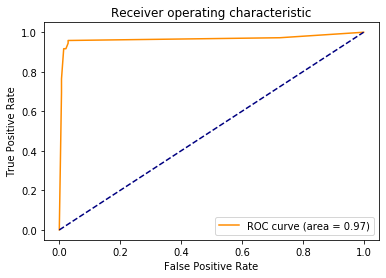

In [267]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [268]:
optimalF1 = 0
optimalTh = 0

In [269]:
thresholds[0:10]

array([1.96094883, 0.96094883, 0.95041705, 0.6924363 , 0.63685494,
       0.47741606, 0.4157629 , 0.07713602, 0.06112818])

In [270]:
for th in thresholds:
    preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
    f1Score = f1_score(y_train, preds)
    if(optimalF1 < f1Score):
        optimalF1 = f1Score
        optimalTh = th

In [271]:
optimalF1 

0.9517241379310345

In [272]:
optimalTh

0.07713602000018488

In [273]:
THRESHOLD = optimalTh

In [274]:
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [275]:
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds), 
                   precision_score(y_test, preds),
                   f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.844444
recall,0.892857
precision,0.694444
f1_score,0.781250


In [276]:
predstrain = np.where(model.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [277]:
pd.DataFrame(data=[accuracy_score(y_train, predstrain), 
                   recall_score(y_train, predstrain), 
                   precision_score(y_train, predstrain),
                   f1_score(y_train, predstrain)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.966667
recall,0.958333
precision,0.945205
f1_score,0.951724


# Naive bayes with Iris data

### Import Iris.csv

In [162]:
iris=pd.read_csv('iris.csv')

In [163]:
iris.head(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [171]:
iris.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [177]:
from sklearn.preprocessing import LabelEncoder
Class=LabelEncoder()
iris['Class']=Class.fit_transform(iris['Class'])
iris.sample(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
78,6.0,2.9,4.5,1.5,1
43,5.0,3.5,1.6,0.6,0
110,6.5,3.2,5.1,2.0,2
89,5.5,2.5,4.0,1.3,1
48,5.3,3.7,1.5,0.2,0


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [178]:
X = iris.drop("Class", axis=1)
y = iris["Class"]

### Find the distribution of target variable (Class)

In [199]:
iris.groupby(by='Class').count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


### Plot the distribution of target variable using histogram

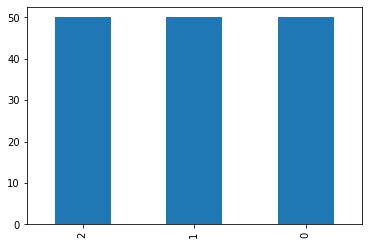

In [183]:
pd.value_counts(iris["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\Srivalli\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Srivalli\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


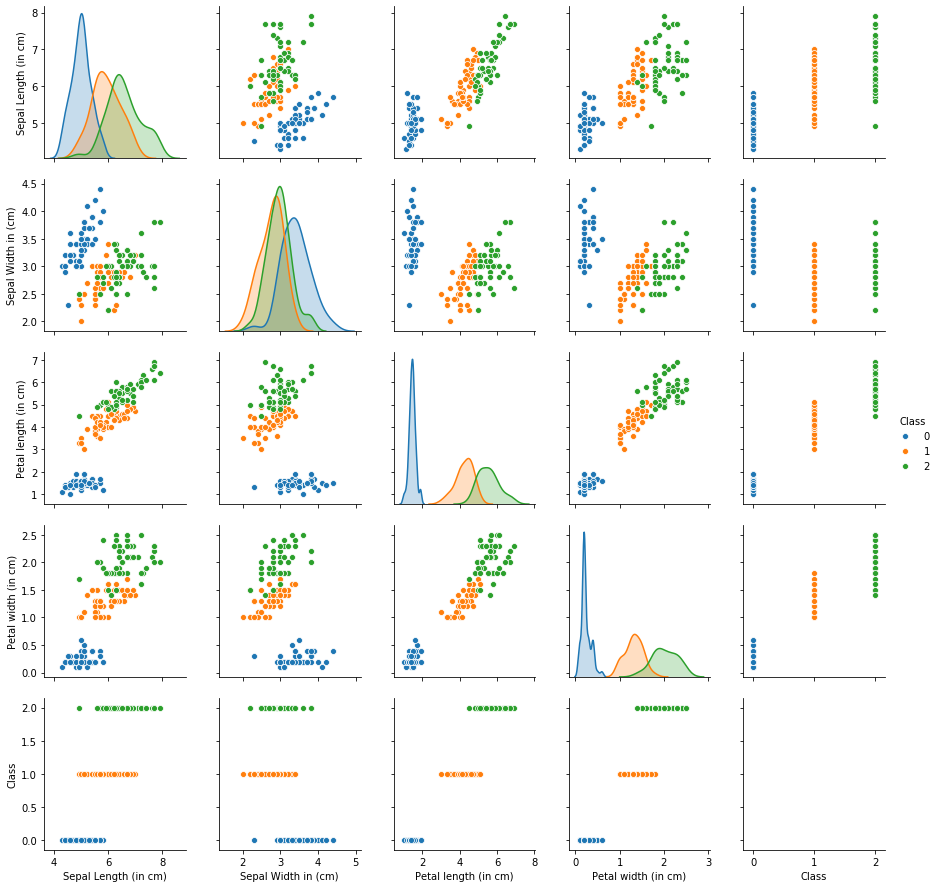

In [200]:
sns.pairplot(iris,hue="Class")

Insights:
petal_length and petal_width are the most useful features to identify "Class" of the iris flower
There is a linear distribution between petal length and petal width, Petal width, Petal length and petalLength and sepal Length, which indicates a strong correlations between the features.

### Summary Statistics and explain insights for at least 2 variables

In [201]:
iris.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Correlation among all variables and give your insights

In [202]:
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


Insights:
correlation betweeb petal length and petal width is highest

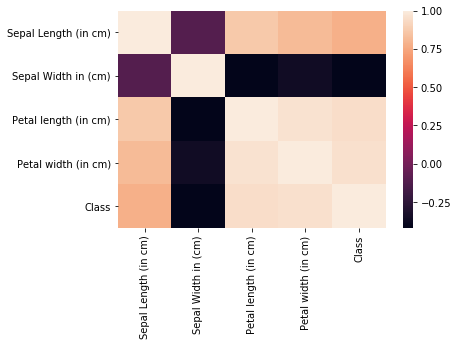

In [203]:
sns.heatmap(iris.corr())

### Split data in Training and Validation in 80:20

In [204]:
X = iris.drop("Class", axis=1)
y = iris["Class"]

In [205]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Do Feature Scaling

In [219]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler=StandardScaler()

for col in X_train.columns:
    X_train[[col]]=scaler.fit_transform(X_train[[col]])
    X_test[[col]]=scaler.fit_transform(X_test[[col]])

In [210]:
X_train.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-3.330669e-17,3.932040e-18,5.181041e-17,7.401487e-18
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.811810e+00,-2.437932e+00,-1.488515e+00,-1.379535e+00
25%,-8.665179e-01,-5.965357e-01,-1.210288e+00,-1.120670e+00
50%,-1.575487e-01,-1.361866e-01,2.643158e-01,1.736553e-01
75%,6.695820e-01,5.543371e-01,7.929475e-01,8.531760e-01
max,2.442005e+00,3.086257e+00,1.794565e+00,1.726846e+00


### Train and Fit NaiveBayes Model

In [211]:
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()

In [212]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [213]:
y_predicted=model.predict(X_test)
model.score(X_train,y_train)

0.9833333333333333

In [214]:
model.score(X_test,y_test)

0.8666666666666667

In [215]:
metrics.confusion_matrix(y_predicted,y_test)

array([[ 7,  0,  0],
       [ 0, 11,  3],
       [ 0,  1,  8]], dtype=int64)

Findings:
Accuracy for Test data is 86%
Accuracy for Train data set is 98%
The outcome was predicted to be class1